In [9]:
import numpy as np
import matplotlib.pyplot as plt


def loadpred(file_name):
    f = open(file_name)
    r = f.readlines()
    content = []
    for i in range(27,len(r)):
        content.append(r[i].split())
    return content



In [19]:
pred = loadpred("2cef.md.pdb_pred.tab")

C_list = []
CA_list = []
CB_list = []
HA_list = []
HN_list = []
N_list = []
for i in range(len(pred)):
    if pred[i][2] == 'C':
        C_list.append(pred[i])
    if pred[i][2] == 'CA':
        CA_list.append(pred[i])
    if pred[i][2] == 'CB':
        CB_list.append(pred[i])
    if pred[i][2] == 'HA' or 'HA2':
        HA_list.append(pred[i])
    if pred[i][2] == 'HN':
        HN_list.append(pred[i])
    if pred[i][2] == 'N':
        N_list.append(pred[i])



In [33]:

CA_2shift = [float(item[3]) for item in CA_list]
res_list = [item[0]+item[1] for item in CA_list]

print(res_list)

['1C', '2R', '3K', '4A', '5G', '6V', '7G', '11K', '12E', '16L', '17N', '18V', '19S']


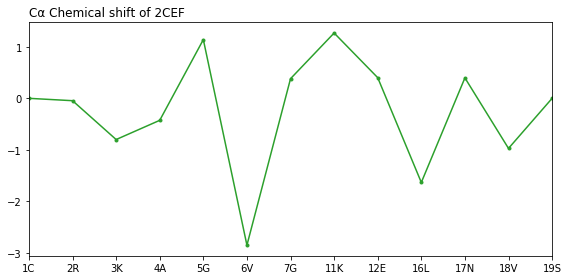

In [35]:
plt.subplots(figsize=(8,4))

plt.plot(CA_2shift,'.-',label='CA',color="tab:green")


plt.xlabel='Residues'
plt.ylabel='Chemical Shift'

plt.title('Cα Chemical shift of 2CEF',loc='left')

plt.xlim(0, len(CA_2shift)-1)
plt.xticks(np.arange(0,len(res_list)),res_list,)

plt.tight_layout()

plt.show()